In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_908\1652017284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [21]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf1 = ColumnTransformer(transformers=[('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trf1.fit_transform(X)

    clf = LogisticRegression()

    print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(4,4))
    stats.probplot(X['Fare'],dist = 'norm',plot=plt)
    plt.title('Fare before Transformation') 
    plt.show()

    plt.figure(figsize=(4,4))
    stats.probplot(X_trans[:,0],dist = 'norm',plot=plt)
    plt.title('Fare After Transformation') 
    plt.show()

Accuracy 0.6589013732833957


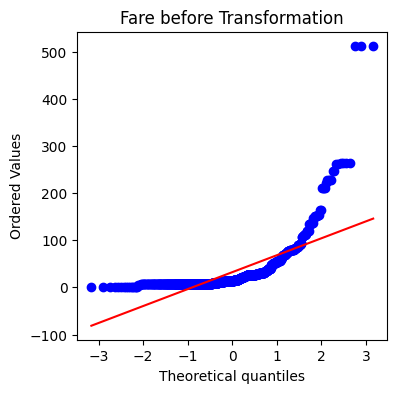

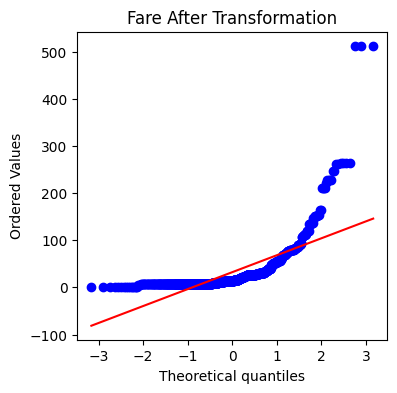

In [22]:
apply_transform(lambda x: x)

Accuracy 0.61729088639201


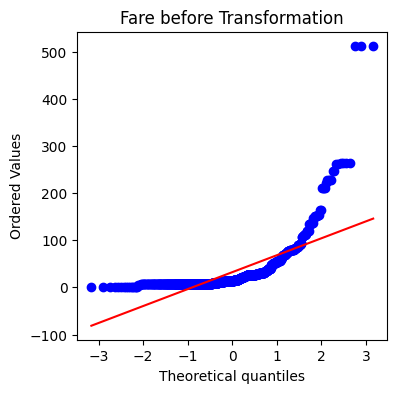

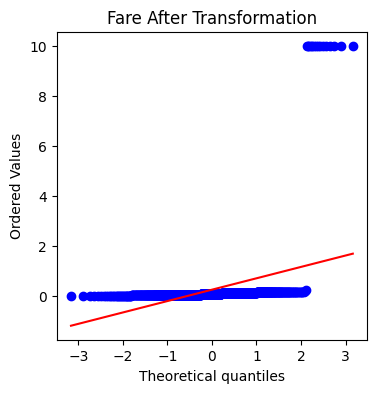

In [24]:
# reciproval
apply_transform(lambda x: 1/(x+0.1))

Accuracy 0.6431335830212235


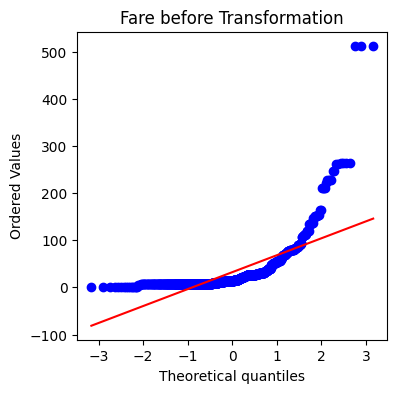

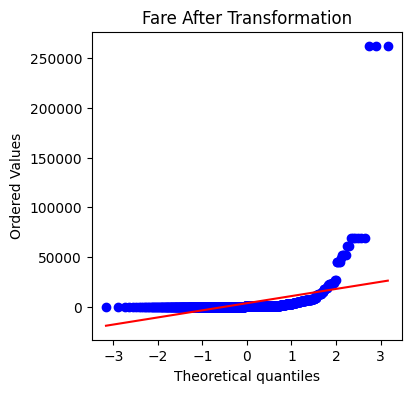

In [25]:
# Square
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


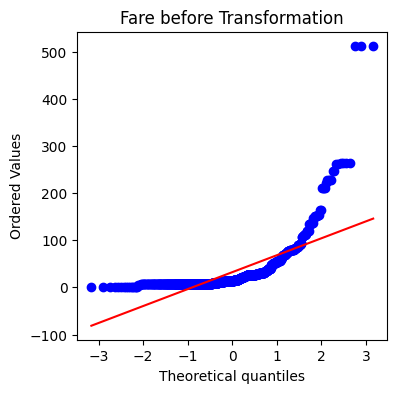

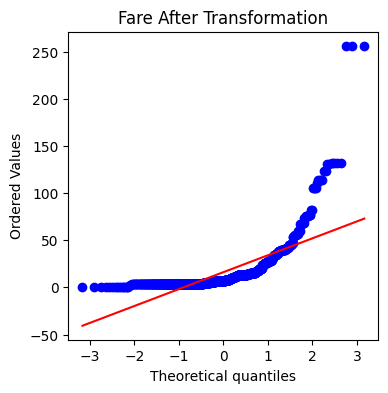

In [26]:
# squareroot
apply_transform(lambda x: x**1/2)

Accuracy 0.6195131086142323


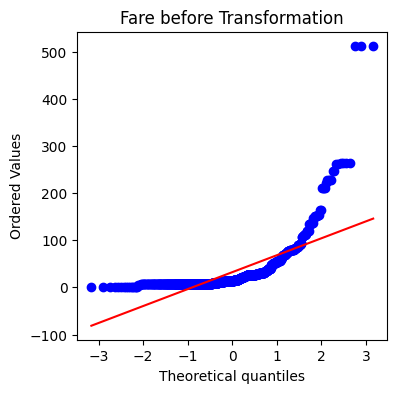

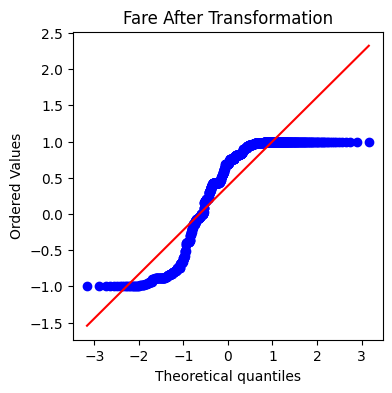

In [27]:
apply_transform(np.sin)